In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


# Architecture

28x28 neurals (input layer)
10 classes (output)
so:
784 neurals (input) --> layer of 128 neurals --> 10 classes (o)

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [8]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [13]:
print(X_train[0])
print(y_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

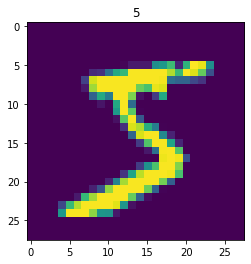

In [22]:
plt.imshow(np.reshape(X_train[0],(28,28)))
plt.title(y_train[0])
plt.show()

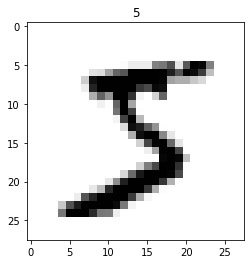

In [24]:
plt.imshow(np.reshape(X_train[0],(28,28)),cmap="binary")
plt.title(y_train[0])
plt.show()

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='softmax'),
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
Total params: 116992 (457.00 KB)
Trainable params: 116992 (457.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(
    optimizer='sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
history = model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3011 - accuracy: 0.1154
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3004 - accuracy: 0.1169
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2999 - accuracy: 0.1176
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2995 - accuracy: 0.1182
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2991 - accuracy: 0.1201


In [40]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2980 - accuracy: 0.1135


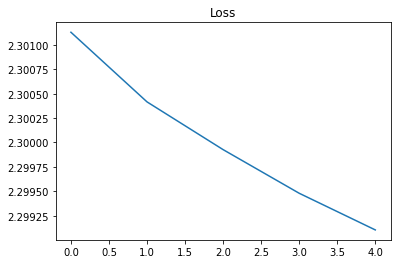

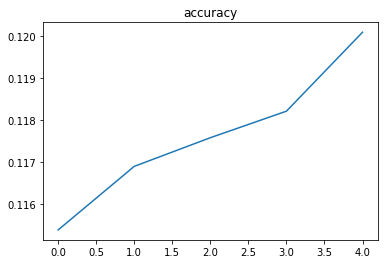

In [41]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("accuracy")
plt.show()

In [43]:
model.save('digit_recognation')

INFO:tensorflow:Assets written to: digit_recognation\assets


INFO:tensorflow:Assets written to: digit_recognation\assets


In [44]:
new_model = tf.keras.models.load_model('digit_recognation')

In [45]:
predictions = new_model.predict([X_test])

313/313 [==============================] - 1s 2ms/step


In [52]:
predictions

array([[9.46736261e-02, 1.11735180e-01, 9.66723710e-02, ...,
        4.54067504e-06, 6.93340917e-06, 8.70961503e-06],
       [9.51286256e-02, 1.12229675e-01, 9.69445705e-02, ...,
        4.51002188e-06, 6.91242985e-06, 8.68807365e-06],
       [9.43719968e-02, 1.13261513e-01, 9.67510268e-02, ...,
        4.53121402e-06, 6.94357186e-06, 8.73406862e-06],
       ...,
       [9.41674858e-02, 1.12020813e-01, 9.67045575e-02, ...,
        4.51553387e-06, 6.91255354e-06, 8.69616997e-06],
       [9.46756378e-02, 1.12311684e-01, 9.67680439e-02, ...,
        4.49270010e-06, 6.88273622e-06, 8.64612593e-06],
       [9.55881327e-02, 1.11548029e-01, 9.68340412e-02, ...,
        4.51994629e-06, 6.90989145e-06, 8.65276434e-06]], dtype=float32)

In [54]:
np.argmax(predictions[5])

1

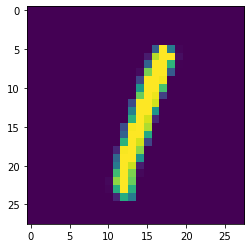

In [55]:
plt.imshow(X_test[5])
plt.show()